Data Analysis on FBI Crime Dataset
(Rows,Colums): (474, 18)


List of States in the USA:  ['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA', 'COLORADO', 'CONNECTICUT', 'DISTRICT OF COLUMBIA', 'FLORIDA', 'GEORGIA', 'HAWAII', 'ILLINOIS', 'INDIANA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA', 'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA', 'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE', 'UTAH', 'VIRGINIA', 'WASHINGTON', 'WISCONSIN']


List of Property crimes per state:  [32459.0, 14561.0, 45115.0, 13488.0, 542701.0, 72883.0, 13326.0, 28933.0, 160801.0, 45143.0, 28798.0, 102668.0, 18657.0, 11194.0, 40045.0, 33225.0, 28284.0, 13446.0, 14638.0, 28508.0, 7367.0, 59793.0, 5387.0, 24269.0, 52470.0, 3001.0, 16653.0, 4630.0, 142182.0, 71111.0, 3546.0, 91052.0, 52843.0, 50224.0, 48770

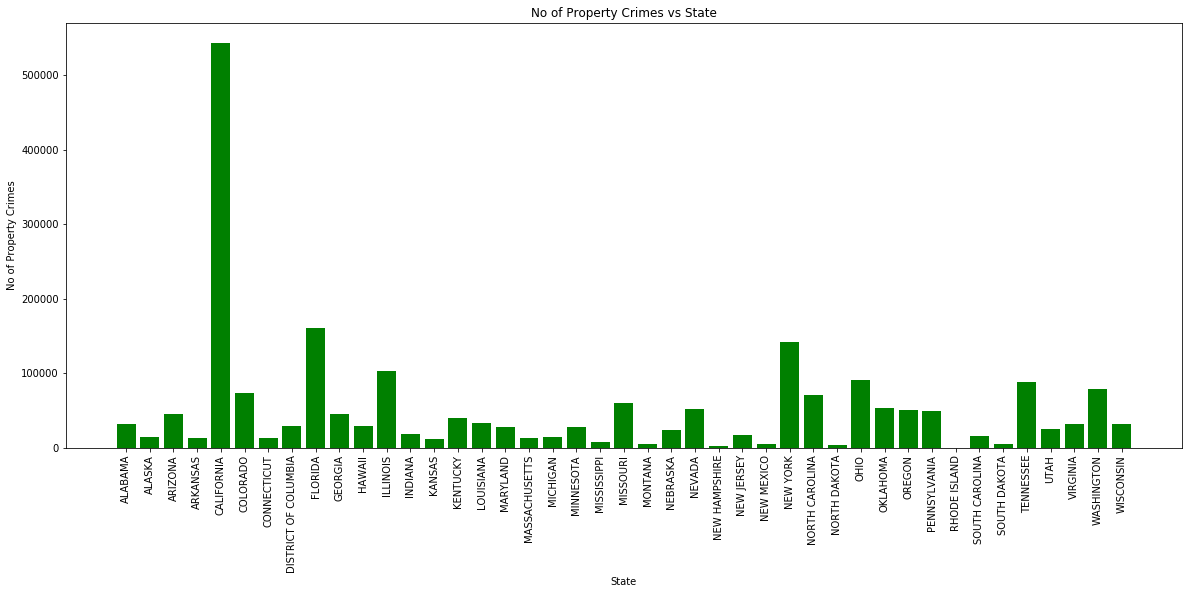

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("D:\IDS Project\Tables\Modified Tables\Table_4_January_to_June_2017_Offenses_Reported_to_Law_Enforcement_by_State_by_City_100,000_and_Over_in_Population.csv")
print("Data Analysis on FBI Crime Dataset")
print("(Rows,Colums):",data.shape)
print("\n")

# Filling empty spaces in the dataset with a space - " "
data = data.fillna(" ")

# To check if all empty spaces are replaced with a space - " "
# print(data.isnull().sum())
# Above Function Prints the number of empty spaces in every column , 0 printed for each column in this case. So,No empty cells. 


# List of States
state_names = []
# List of Indices corresponding to each state in the csv file.
state_index = []
# List of Violent Crime (v_crime) per CITY from the csv file. (Literally all the values in the 'Property_crime' collumn , including spaces)
Total_pcrime_per_city = []
# List of Violent Crime (v_crime) per STATE. Sum of the values of 'Property_crime' for all cities under each state from the csv file. 
Total_pcrime_per_state = []


# Obtaining the list of names of the States and their indices as per the csv.
for index,state in data.State.iteritems():
    if state != " ":
        state_names.append(state)
        state_index.append(index)
        

# Obtaining the list of Violent crimes corresponding to each city (Spaces ie; blank values included).Simply converting the entire column to a list 
for crime in data.Property_crime:
        Total_pcrime_per_city.append(crime)
        
        
# Obtaining the list of Violent crimes for each state, Adding up the violent crimes for each city under the given state.(Spaces ie; blank values excluded).
for i in state_index:
#   sum refreshes for every new state, in the end of for loop 'sum' is the sum of violent crimes for all the cities under the i-th state.  
    sum = 0
    j=i
    
#   If it is the last state in the given csv file, this block is executed. Executed only once for a given file.  
    if(i == state_index[-1]):
        next = len(Total_pcrime_per_city)
        while(j<next):
#                 condition to check for spaces/empty cells, if found not added to the 'sum' 
            if(Total_pcrime_per_city[j]!=" "):      
                sum = sum + Total_pcrime_per_city[j]
            j+=1
            
#   If it is any other state apart from the last state in the csv file , this block is executed. For n states this block is executed n-1 times.           
    else:
        next = state_index.index(i)+1
        while(j<state_index[next]):
#                 condition to check for spaces/empty cells, if found not added to the 'sum' 
            if(Total_pcrime_per_city[j]!=" "):
                sum = sum + Total_pcrime_per_city[j]
            j+=1
#   Appending the sum of the violent crimes under a given state, in the same order of states as the state_names List.          
    Total_pcrime_per_state.append(sum)
    
    
print("List of States in the USA: ",state_names)
print("\n")
print("List of Property crimes per state: ",Total_pcrime_per_state)



def plot_bar_graph():
    %matplotlib inline
    plt.rcParams['figure.figsize'] = (20,10)
    bar_width = 0.8
    # this is for plotting purpose
    index = np.arange(len(state_names))
    plt.bar(index, Total_pcrime_per_state , bar_width , color = 'green')
    plt.xlabel("State", fontsize=10)
    plt.ylabel('No of Property Crimes', fontsize=10)
    plt.xticks(index, state_names, fontsize=10, rotation=90)
    plt.subplots_adjust(bottom=0.4, top=0.99)
    plt.title('No of Property Crimes vs State')
    plt.show()
    
  
plot_bar_graph()    
